## All Imports Here:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import resampy
import scipy.signal as signal
import librosa

#### Inputs:
wave_filepath: Full File Path of the Wave File <br>
resample_freq: Resampling Frequency required
n_components: # of Mel Frequency Cepstral Coefficients

#### Output:
MFCC features for generating phonemes

In [2]:
def getFeatures(wave_filepath, resample_freq, n_components):
    f, data = wavfile.read(wave_filepath)
    #data = data[:, 0]
    speech_read = resampy.resample(data, f, resample_freq)
    sp_f, sp_t, speech_Zxx = signal.stft(np.array(speech_read), window='hamming', nperseg=1024, noverlap=0.75*1024)
    Sxx = np.log(np.absolute(speech_Zxx))
    plt.pcolormesh(sp_t, sp_f, Sxx)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    
    signal_y, sr = librosa.load(wave_filepath)
    mfcc = librosa.feature.mfcc(y=signal_y, sr=resample_freq, n_mfcc=n_components)
    
    return mfcc.T
    

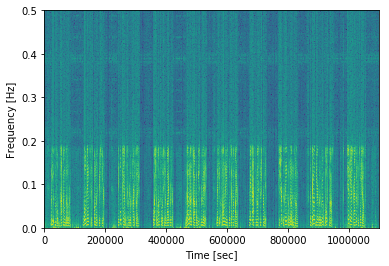

In [4]:
m = getFeatures("speech.wav", 20500, 80)

In [4]:
m

array([[-4.90855475e+02,  5.36653160e+01, -5.57369381e+00, ...,
         1.37300634e+01,  2.33929203e+00, -9.83595997e+00],
       [-4.88721308e+02,  6.15046216e+01, -1.19807374e+00, ...,
         1.06293742e+01,  1.71531079e+00, -1.00401058e+01],
       [-4.41220391e+02,  7.61942388e+01, -3.78198646e+01, ...,
         5.47202210e+00, -6.07383705e+00, -6.30282838e-01],
       ...,
       [-5.08232645e+02,  5.92148462e+01,  1.18487238e+01, ...,
         4.00519532e+00,  3.73135994e+00,  7.65803647e-01],
       [-5.08686385e+02,  5.36214529e+01,  5.96317903e+00, ...,
         8.79899253e+00,  8.74832063e+00,  2.45661076e+00],
       [-5.15039105e+02,  4.45052363e+01,  4.83070098e-01, ...,
         1.08947406e+01,  1.01368280e+01,  1.47001487e+00]])

In [5]:
m.shape

(2309, 12)